In [18]:
print('Hello i am Maickery, and this is my final week3 capstone assignment')

Hello i am Maickery, and this is my final week3 capstone assignment


In [8]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Needed libraries are imported.')

Needed libraries are imported.


In [6]:
df = pd.read_csv(r'df_final.csv')
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [4]:
df.shape #Show the shape

(103, 5)

In [10]:
print('My dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

My dataframe has 10 boroughs and 103 neighborhoods.


In [12]:
# Create dataframe with Borough values contains Toronto word
df = df[df['Borough'].str.contains('Downtown Toronto')]
df.reset_index(drop=True,inplace=True)
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
7,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752


In [15]:
df.loc[17, 'Neighborhood'] # take a little look

'Christie'

In [19]:
df_latitude = df.loc[17, 'Latitude'] # df latitude value
df_longitude = df.loc[17, 'Longitude'] # df longitude value

df_name = df.loc[17, 'Neighborhood'] # df name

print('Latitude and longitude values of {} are {}, {}.'.format(df_name, 
                                                               df_latitude, 
                                                               df_longitude))

Latitude and longitude values of Christie are 43.669542, -79.4225637.


In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

df.plot(column='Latitude', ax=ax, legend=True, cax=cax

SyntaxError: unexpected EOF while parsing (<ipython-input-29-5d65acda333a>, line 9)

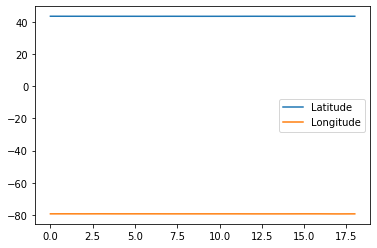

In [22]:
df.plot()

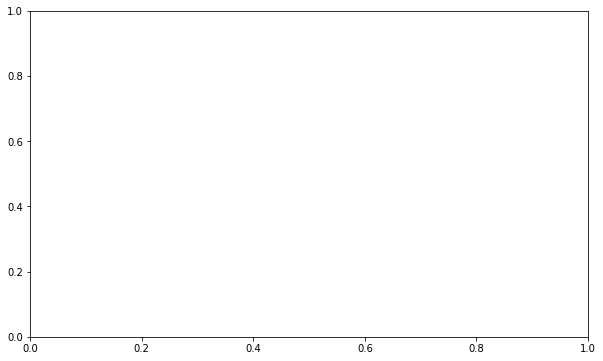

In [30]:
import matplotlib.pyplot as plt
# set a variable that will call whatever column we want to visualise on the map
variable = 'Latitude'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

In [31]:
# create map
df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

AttributeError: 'Line2D' object has no property 'column'

## Customising the map

In [ ]:
ax.axis('off') # remove the axis

In [ ]:
# add a title
ax.set_title(‘Preventable death rate in London’, fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate(‘Source: London Datastore, 2014’,xy=(0.1, .08),  xycoords=’figure fraction’, horizontalalignment=’left’, verticalalignment=’top’, fontsize=12, color=''#555555')
            
            # Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=’Blues’, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
            
            fig.savefig(“map_export.png”, dpi=300)